In [30]:
% matplotlib notebook
% matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import numpy as np

# Add path to ffmpeg
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

## Haar Wavelet

In [195]:
t = np.linspace(0,1,10000) # define time space
#j = np.arange(0,100,1)
N = 10

In [196]:
def haar(t, j, k):
    '''Creates nth Haar function where n=2**j+k'''
    y = 0
    if k/2**j <= t < (1/2**(j+1) + k/2**j):
        y = 2**(j/2)
    elif (1/2**(j+1) + k/2**j)<= t <= (k+1)/2**j:
        y = -2**(j/2)
    return y

In [197]:
hn = {}
for i in range(N):
    k = np.arange(0,2**i,1)
    for d in k:
        n = 2**i + d
        y = [haar(time, i, d) for time in t]
        hn[n] = y

In [198]:
#Create dataframe with Hn's as columns
hn_df = pd.DataFrame(hn)
hn_df[0] = 1 
hn_df = hn_df[sorted(list(hn_df.columns))]

In [236]:
hn_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,1.0,1.414214,0.0,2.0,0.0,0.0,0.0,2.828427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.414214,0.0,2.0,0.0,0.0,0.0,2.828427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


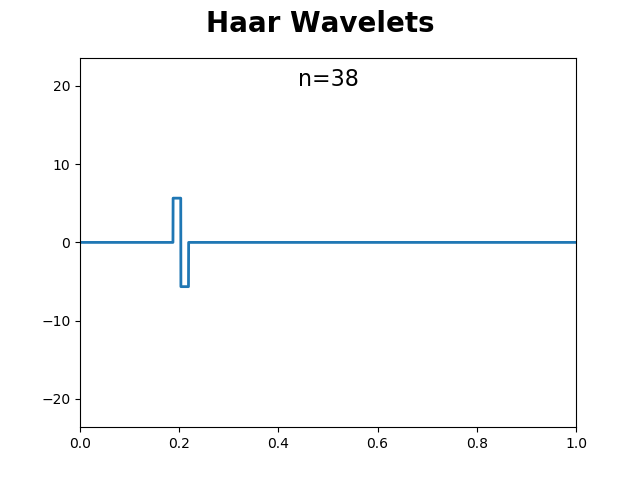

In [237]:
maxval = hn_df.iloc[:,-2].max()+1

# First set up the figure, the axis, and the plot element to animate
fig1 = plt.figure()
ax1 = plt.axes(xlim=(0, 1), ylim=(-maxval, maxval))
line1, = ax1.plot([], [], lw=2)

# Initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    return line1,

# Animation function.  This is called sequentially
def animate(c):
    x = t
    y = hn_df.iloc[:,c]
    line1.set_data(x, y)
    ax1.set_title('n='+str(c), fontsize=16, x = 0.5, y=0.9)
    return line1,

# Call the animator.  blit=True means only re-draw the parts that have changed.
steps = np.arange(0,len(hn_df.columns),1)
anim = animation.FuncAnimation(fig1, animate, steps, init_func=init,
                            interval=400, blit=True)

plt.suptitle('Haar Wavelets', fontsize=20,weight='bold')

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.88,
                wspace=None, hspace=None)

fig1.show()

## Haar Integral Wavelet

In [201]:
def haar_integral(t, j, k):
    '''Creates nth Haar integral function where n=2**j+k'''
    y = 0
    if k/2**j <= t < (1/2**(j+1) + k/2**j):
        y = 2*(2**j)*t - 2*k
    elif (1/2**(j+1) + k/2**j)<= t <= (k+1)/2**j:
        y = 2 - 2*(2**j)*t + 2*k
    return y

In [202]:
hin = {} #haar integral placeholder
gn = {} #lambda placeholder
for i in range(N):
    k = np.arange(0,2**i,1)
    for d in k:
        n = 2**i + d
        y = [haar_integral(time, i, d) for time in t]
        hin[n] = y
        gn[n] = 1/2*(2**(-i/2))

In [203]:
#Create dataframe with each Hn integrals as columns
hin_df = pd.DataFrame(hin)
hin_df[0] = t
hin_df = hin_df[sorted(list(hin_df.columns))]

gn[0] = 1 #Set gamma 0

In [204]:
hin_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0001,0.0002,0.0004,0.0,0.0008,0.0,0.0,0.0,0.0016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


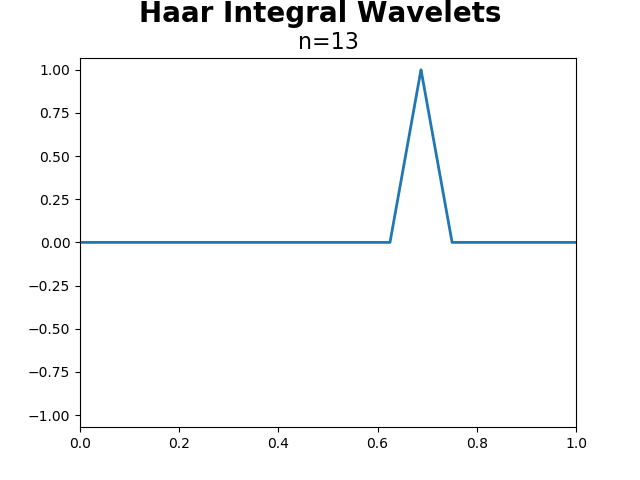

In [238]:
maxval = hin_df.iloc[:,-2].max()+0.1

# First set up the figure, the axis, and the plot element to animate
fig2 = plt.figure()
ax2 = plt.axes(xlim=(0, 1), ylim=(-maxval, maxval))
line2, = ax2.plot([], [], lw=2)

# Initialization function: plot the background of each frame
def init():
    line2.set_data([], [])
    return line2,

# Animation function.  This is called sequentially
def animate(c):
    x = t
    y = hin_df.iloc[:,c]
    line2.set_data(x, y)
    ax2.set_title('n='+str(c), fontsize=16)
    return line2,

# Call the animator.  blit=True means only re-draw the parts that have changed.
steps = np.arange(0,len(hin_df.columns),1)
anim = animation.FuncAnimation(fig2, animate, steps, init_func=init,
                            interval=400, blit=True)

plt.suptitle('Haar Integral Wavelets', fontsize=20,weight='bold', y=1)

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.88,
                wspace=None, hspace=None)
fig2.show()

## Brownian Motion

<IPython.core.display.Javascript object>


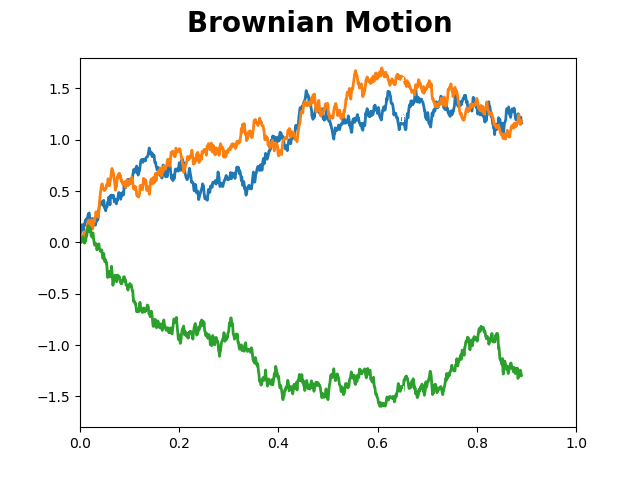

In [239]:
def brownian(gn, hin_df, n):
    '''Approximates for a standard Brownian Motion on the interval
    [0,1] with. n is the number of Haar integral basis used in the 
    approximation'''
    xt = 0
    for i in range(n):
        xt = xt + gn[i]*hin_df[i]*np.random.normal(0,1)
    return xt

# Constructs 3 different standard Brownian Motions on the interval [0,1]
bns = [brownian(gn, hin_df, len(hin_df.columns)) for i in range(3)]


## Plot
upper = max([max(i) for i in bns])
lower = min([min(i) for i in bns])
maxval = max(upper, -lower) +0.1

# First set up the figure, the axis, and the plot element we want to animate
#fig3 = plt.figure(figsize= (10,10/golden))
fig3 = plt.figure()
ax3 = plt.axes(xlim=(0, 1), ylim=(-maxval, maxval))
line31, = ax3.plot([], [], lw=2)
line32, = ax3.plot([], [], lw=2)
line33, = ax3.plot([], [], lw=2)


# initialization function: plot the background of each frame
def init():
    line31.set_data([], [])
    line32.set_data([], [])
    line33.set_data([], [])
    return line31, line32, line33

def animate(c):
    line31.set_data(t[:c], bns[0][:c])
    line32.set_data(t[:c], bns[1][:c])
    line33.set_data(t[:c], bns[2][:c])
    return line31, line32, line33

# call the animator.  blit=True means only re-draw the parts that have changed.
steps = np.arange(0,len(t)-1,1)
anim = animation.FuncAnimation(fig3, animate, steps, init_func=init,
                            interval=1, blit=True)

plt.suptitle('Brownian Motion', fontsize=20, fontweight='bold', 
             ha='center')

FFwriter = animation.FFMpegWriter(fps=1000)

fig3.show()